In [6]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline 
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import chi2
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation
import keras.utils
import re
from keras.preprocessing import sequence
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import LinearSVC

In [7]:
names=['URL','Category']
df=pd.read_csv('URL Classification.csv',names=names, na_filter=False)
df1 = df[1:2001]
df2 = df[50000:52000]
df3 = df[520000:522000]
df4 =df[535300:537300]
df5 = df[650000:652000]
df6= df[710000:712000]
df7=  df[764200:766200]
df8=  df[793080:795080]
df9=  df[839730:841730]
df10=  df[850000:852000]
df11=  df[955250:957250]
df12=  df[1013000:1015000]
df13=  df[1143000:1145000]
df14=  df[1293000:1295000]
df15=  df[1492000:1494000]
#df6 = df[77000:1562978]
dt=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15], axis=0)
df.drop(df.index[1:2000],inplace= True)
df.drop(df.index[50000:52000],inplace= True)
df.drop(df.index[520000:522000],inplace= True)
df.drop(df.index[535300:537300],inplace= True)
df.drop(df.index[650000:652000],inplace= True)
df.drop(df.index[710000:712000],inplace= True)
df.drop(df.index[764200:766200],inplace= True)
df.drop(df.index[793080:795080],inplace= True)
df.drop(df.index[839730:841730],inplace= True)
df.drop(df.index[850000:852000],inplace= True)
df.drop(df.index[955250:957250],inplace= True)
df.drop(df.index[1013000:1015000],inplace= True)
df.drop(df.index[1143000:1145000],inplace= True)
df.drop(df.index[1293000:1295000],inplace= True)
df.drop(df.index[1492000:1494000],inplace= True)
df.tail()

,URL,Category
1562974,http://www.maxpreps.com/,Sports
1562975,http://www.myscore.com/,Sports
1562976,http://sportsillustrated.cnn.com/highschool,Sports
1562977,http://rss.cnn.com/rss/si_highschool?format=xml,Sports
1562978,http://www.usatoday.com/sports/preps/,Sports


Text(0, 0.5, 'Total Number Of Individual Category for Training')

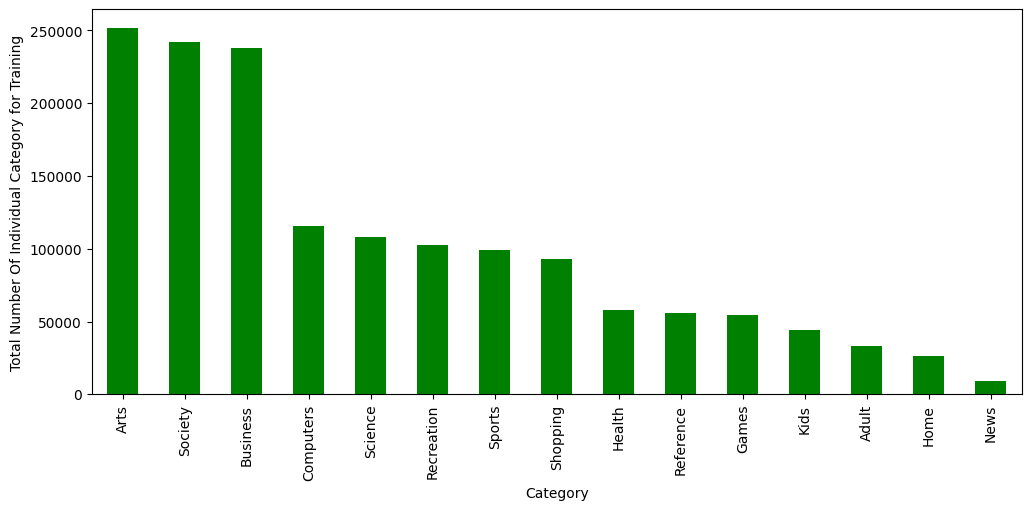

In [8]:
df.Category.value_counts().plot(figsize=(12,5),kind='bar',color='green');
plt.xlabel('Category')
plt.ylabel('Total Number Of Individual Category for Training')

Text(0, 0.5, 'Total Number Of Individual Category for Testing')

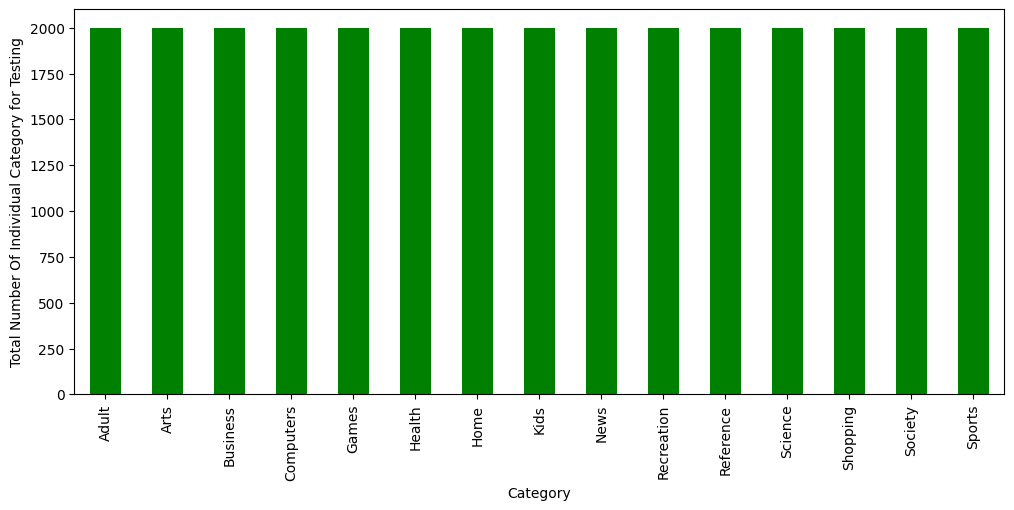

In [10]:
dt.Category.value_counts().plot(figsize=(12,5),kind='bar',color='green');
plt.xlabel('Category')
plt.ylabel('Total Number Of Individual Category for Testing')

In [11]:
X_train=df['URL']
y_train=df['Category']
#print(X_train)
X_train.shape

(1532979,)

In [14]:
X_test=dt['URL']
y_test=dt['Category']
#print(X_test)
X_test.shape

(30000,)

In [15]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])
text_clf = text_clf.fit(X_train, y_train)

In [16]:
from sklearn.model_selection import RandomizedSearchCV
n_iter_search = 5
parameters = {'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False), 'clf__alpha': (1e-2, 1e-3)}
gs_clf = RandomizedSearchCV(text_clf, parameters, n_iter = n_iter_search)
gs_clf = gs_clf.fit(X_train, y_train)

In [17]:
#X_train, X_test, y_train, y_test = train_test_split(df['URL'], df['Category'],test_size=0.3, random_state = 0)

In [18]:
#y=np.array(df[names[1]])
#print(y)

#from sklearn.pipeline import Pipeline
#from sklearn.multiclass import OneVsRestClassifier
#from nltk.corpus import stopwords
#stop_words = set(stopwords.words('english'))

#text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])
#text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', OneVsRestClassifier(MultinomialNB(fit_prior=True, class_prior=None)))])
#text_clf= Pipeline([
                #('tfidf', TfidfVectorizer(stop_words=stop_words)),
                #('clf', OneVsRestClassifier(MultinomialNB(
                   # fit_prior=True, class_prior=None))),
            #])
#text_clf = text_clf.fit(X_train, y_train)
#test_clf =text_clf.fit(X_test, y_test)

In [ ]:
#text_clf.get_params().keys()

In [ ]:
#from sklearn.model_selection import RandomizedSearchCV
#n_iter_search = 5
#parameters = {'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False), 'clf__estimator__alpha': (1e-2, 1e-3)}
#parameters = {'tfidf__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False), 'clf__estimator__alpha': (1e-2, 1e-3)}
#gs_clf = RandomizedSearchCV(text_clf, parameters, n_iter = n_iter_search)
#gs_clf = gs_clf.fit(X_train, y_train)

In [ ]:
#print(X_test)

In [19]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
#grid_mean_scores = [result.mean_validation_score for result in gs_clf.grid_scores_]
#print(grid_mean_scores)
y_pred=gs_clf.predict(X_test)
precision_recall_fscore_support(y_test, y_pred, average='weighted')

(0.8280286986534042, 0.7153333333333334, 0.6921852049932573, None)

In [20]:
y_pred=gs_clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Adult       0.97      0.13      0.23      2000
        Arts       0.39      0.89      0.54      2000
    Business       0.43      0.98      0.60      2000
   Computers       0.84      0.84      0.84      2000
       Games       0.95      0.72      0.82      2000
      Health       0.98      0.88      0.93      2000
        Home       0.97      0.47      0.63      2000
        Kids       0.92      0.36      0.52      2000
        News       1.00      0.08      0.15      2000
  Recreation       0.89      0.94      0.91      2000
   Reference       0.73      0.75      0.74      2000
     Science       0.84      0.92      0.88      2000
    Shopping       0.96      0.91      0.93      2000
     Society       0.60      0.97      0.74      2000
      Sports       0.95      0.87      0.91      2000

    accuracy                           0.72     30000
   macro avg       0.83      0.72      0.69     30000
weighted avg       0.83   

In [21]:
print(classification_report(y_test, y_pred, digits=4))


              precision    recall  f1-score   support

       Adult     0.9705    0.1315    0.2316      2000
        Arts     0.3877    0.8920    0.5405      2000
    Business     0.4348    0.9825    0.6029      2000
   Computers     0.8385    0.8440    0.8413      2000
       Games     0.9521    0.7250    0.8232      2000
      Health     0.9816    0.8810    0.9286      2000
        Home     0.9740    0.4675    0.6318      2000
        Kids     0.9248    0.3630    0.5214      2000
        News     1.0000    0.0835    0.1541      2000
  Recreation     0.8899    0.9380    0.9133      2000
   Reference     0.7316    0.7525    0.7419      2000
     Science     0.8355    0.9195    0.8755      2000
    Shopping     0.9558    0.9085    0.9316      2000
     Society     0.5964    0.9745    0.7399      2000
      Sports     0.9470    0.8670    0.9052      2000

    accuracy                         0.7153     30000
   macro avg     0.8280    0.7153    0.6922     30000
weighted avg     0.8280   

<Axes: >

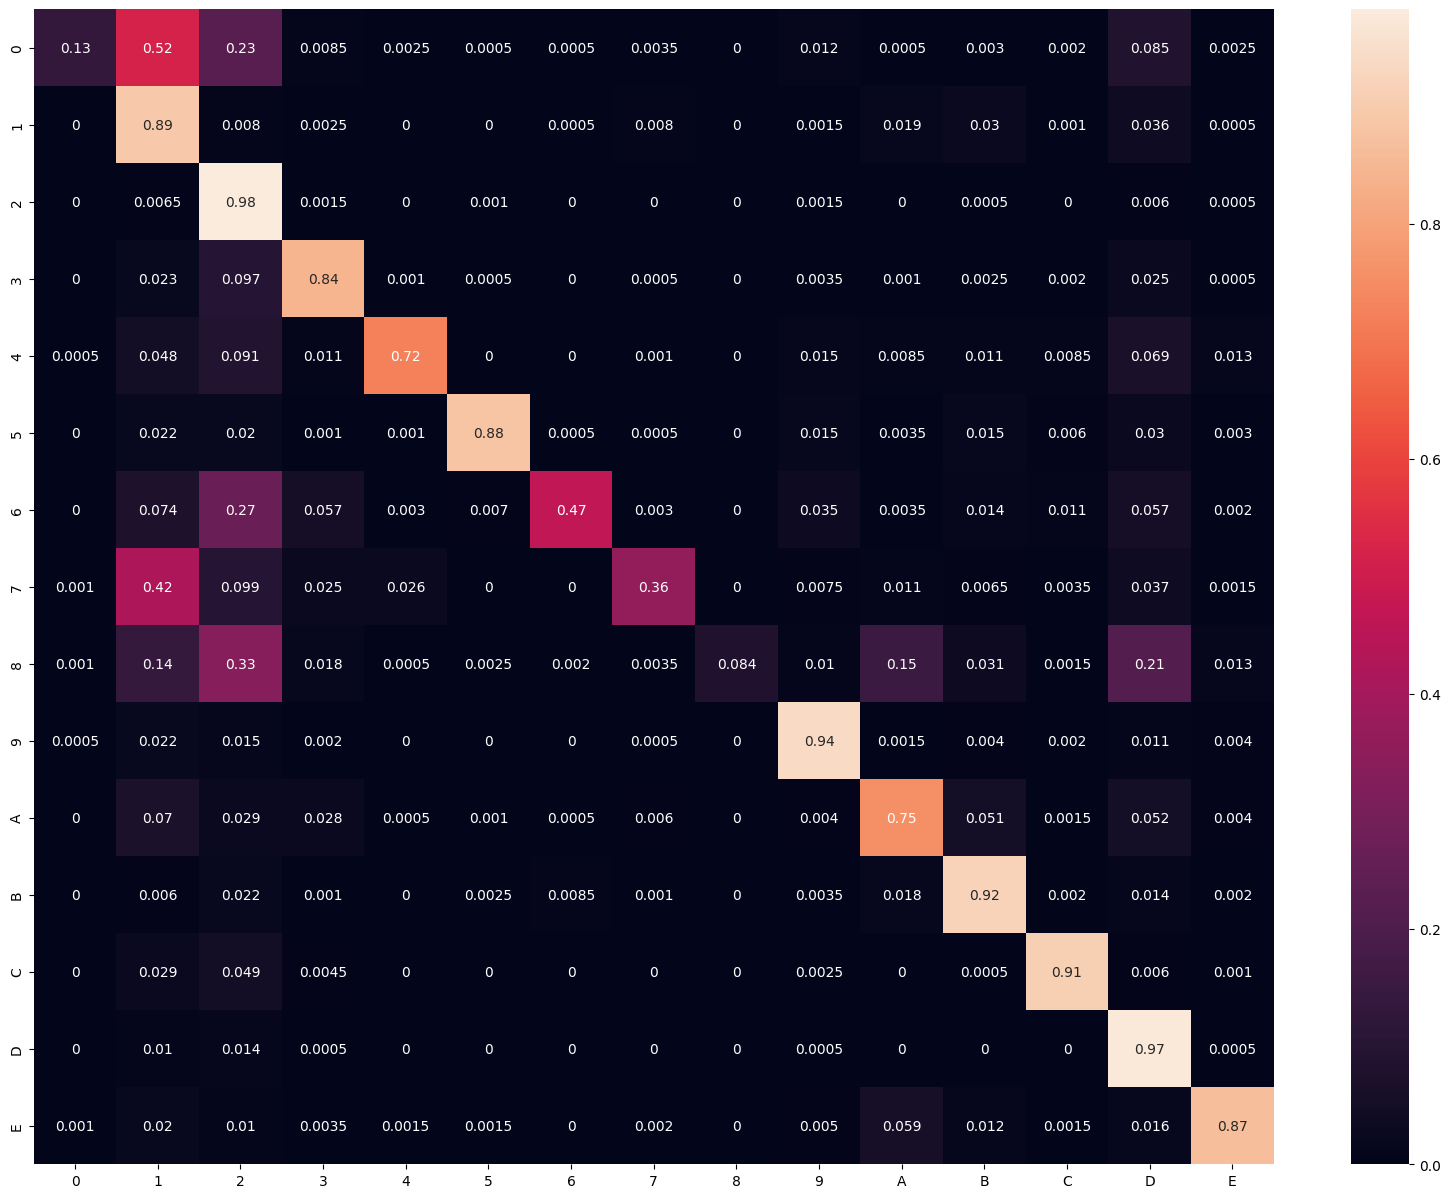

In [22]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
array = confusion_matrix(y_test, y_pred)
cm=np.array(array)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cm, index = [i for i in "0123456789ABCDE"],
                  columns = [i for i in "0123456789ABCDE"])
plt.figure(figsize = (20,15))
sn.heatmap(df_cm, annot=True)

In [23]:
print('Naive Bayes Train Accuracy = ',metrics.accuracy_score(y_train,gs_clf.predict(X_train)))
print('Naive Bayes Test Accuracy = ',metrics.accuracy_score(y_test,gs_clf.predict(X_test)))

Naive Bayes Train Accuracy =  0.8959626974668277
Naive Bayes Test Accuracy =  0.7153333333333334


In [38]:
print(gs_clf.predict(['http://www.ionmedia.tv/stations/default.cfm?sti_id=61&amp;siteid=50642']))
print(gs_clf.predict(['http://www.nbc11.com/']))
print(gs_clf.predict(['http://www.pufferlist.com/']))

['Arts']
['Arts']
['Recreation']


AttributeError: 'RandomizedSearchCV' object has no attribute 'save'